In [ ]:
# pip install ISLP

In [ ]:
# basic imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from ISLP import load_data
from sklearn.preprocessing import StandardScaler

# new imports
from sklearn.cluster import KMeans, AgglomerativeClustering # models to use
from scipy.cluster.hierarchy import dendrogram # for visulization
from ISLP.cluster import compute_linkage # calculating the linkage distance

# Kmeans

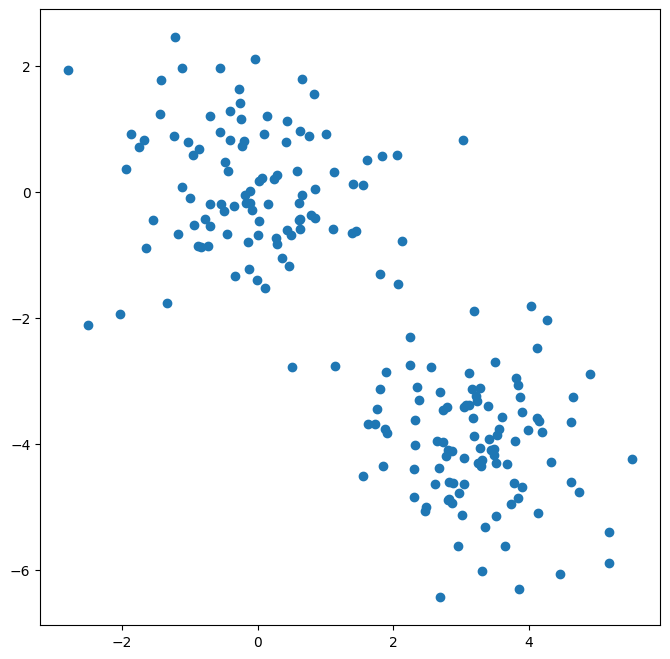

In [ ]:
# Genearate Random Data
np.random.seed(1)
X = np.random.standard_normal((200,2))
X[:100,0] += 3
X[:100,1] -= 4

# visulize the data
fig, ax = plt.subplots(1,1,figsize=(8,8))
ax.scatter(X[:,0], X[:,1])

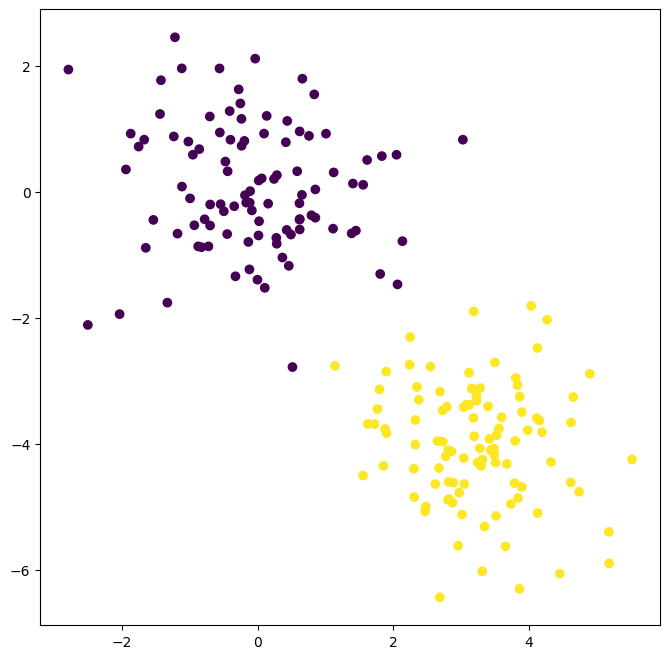

In [ ]:
# create a model
kmeans_model = KMeans(n_clusters=2, # no of clusters to form ,increase leads to overfitting and decreasing leads to uderfitting
                      random_state=14,# random state
                      n_init=15) # no of iterations

# train model
kmeans_model.fit(X)

# visulize clusters
fig, ax = plt.subplots(1,1,figsize=(8,8))
ax.scatter(X[:,0], X[:,1], c=kmeans_model.labels_)

# Hierarcial Clustering

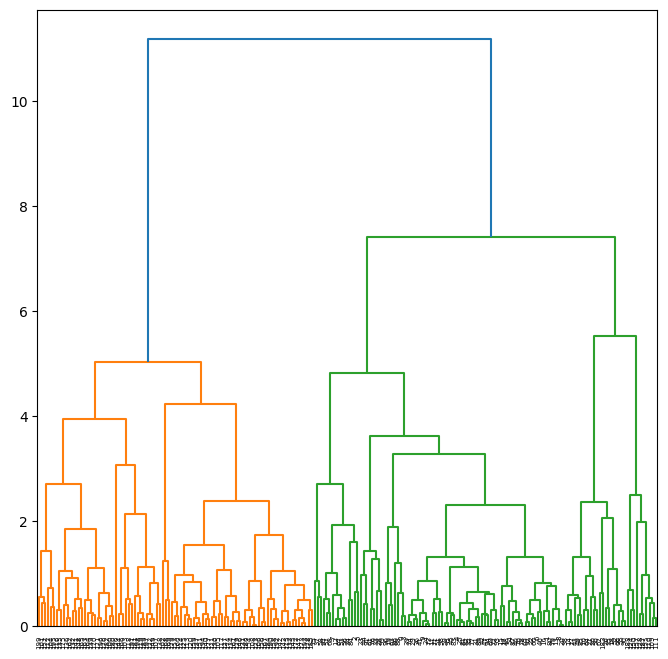

In [ ]:
# create a model
h_model = AgglomerativeClustering
h_model = h_model(linkage='complete', n_clusters=None, distance_threshold=0)

#train model
h_model.fit(X)

# visulize the model
c_distance = compute_linkage(h_model)
fig , ax = plt.subplots(1,1, figsize=(8,8))
dendrogram(c_distance, ax=ax ,); # add ; to avoid extra text

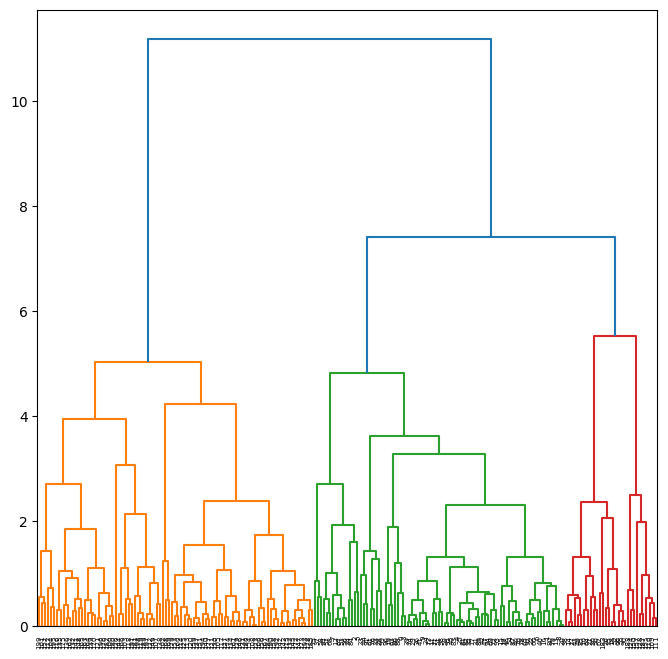

In [ ]:
c_distance = compute_linkage(h_model)
fig , ax = plt.subplots(1,1, figsize=(8,8))
dendrogram(c_distance, ax=ax , color_threshold=6); # include color_threshold to cut clusters

# longer the vertical lines more seperated the cluster is

# Using Real dataset

In [ ]:
data = load_data('NCI60')
X = data['data']
y = data['labels']
X.shape, y.shape

((64, 6830), (64, 1))

In [ ]:
from sklearn.decomposition import PCA # to reduce dimentions , to visulize (these are 2 advantages of PCA) # principle Component Analysis

# scale the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

pca = PCA(n_components=2) # 2 features
X_scaled = pca.fit_transform(X_scaled)
X = X_scaled
X_scaled.shape

(64, 2)

## Kmeans

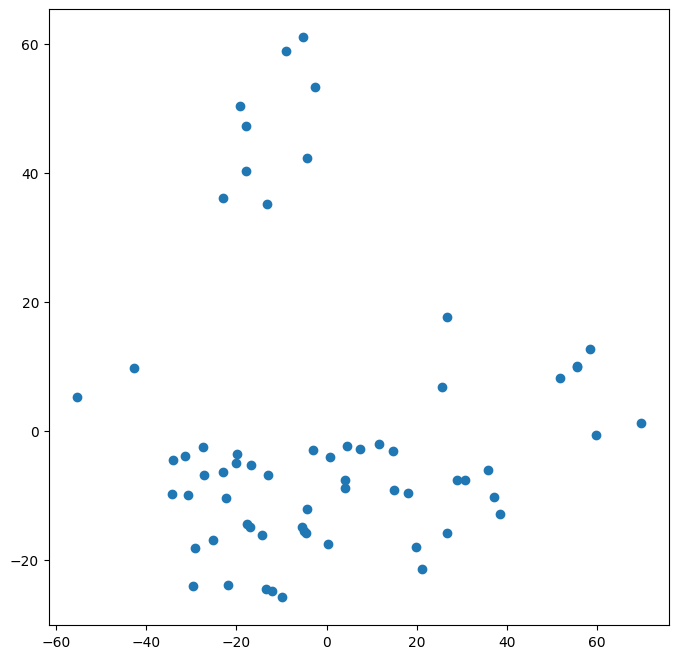

In [ ]:
# visulize the data
fig, ax = plt.subplots(1,1,figsize=(8,8))
ax.scatter(X[:,0], X[:,1])

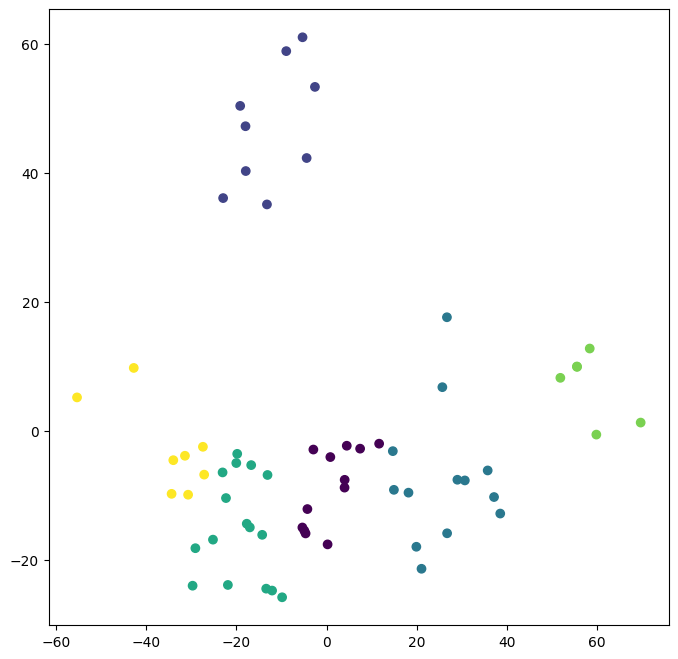

In [ ]:
# create a model
kmeans_model = KMeans(n_clusters=6, # no of clusters to form ,increase leads to overfitting and decreasing leads to uderfitting
                      random_state=14,# random state
                      n_init=15) # no of iterations

# train model
kmeans_model.fit(X)

# visulize clusters
fig, ax = plt.subplots(1,1,figsize=(8,8))
ax.scatter(X[:,0], X[:,1], c=kmeans_model.labels_)

# Hierarcial CLustering

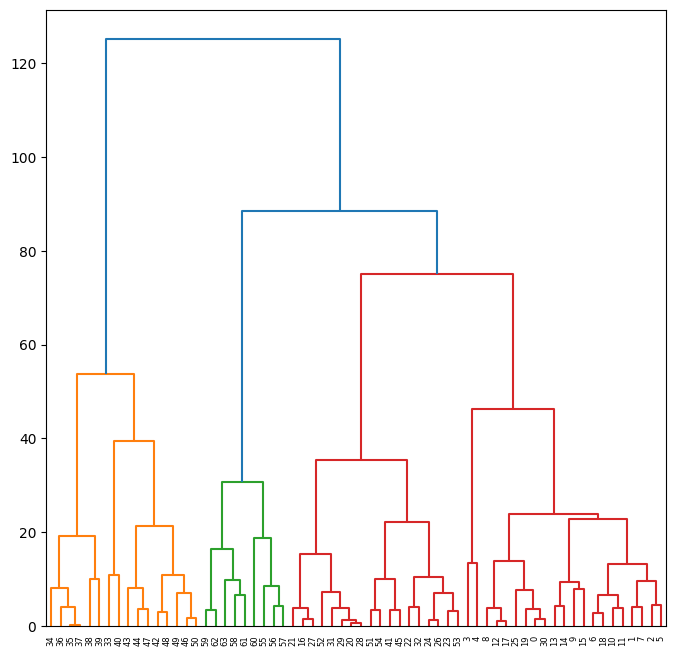

In [ ]:
# create a model
h_model = AgglomerativeClustering
h_model = h_model(linkage='complete', n_clusters=None, distance_threshold=0)

#train model
h_model.fit(X)

# visulize the model
c_distance = compute_linkage(h_model)
fig , ax = plt.subplots(1,1, figsize=(8,8))
dendrogram(c_distance, ax=ax ,); # add ; to avoid extra text

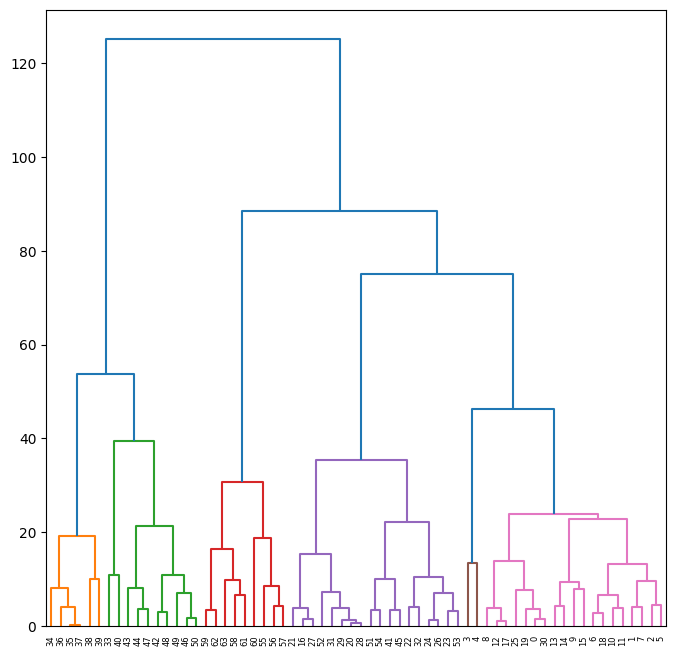

In [ ]:
c_distance = compute_linkage(h_model)
fig , ax = plt.subplots(1,1, figsize=(8,8))
dendrogram(c_distance, ax=ax , color_threshold=45); # include color_threshold to cut clusters

# longer the vertical lines more seperated the cluster is

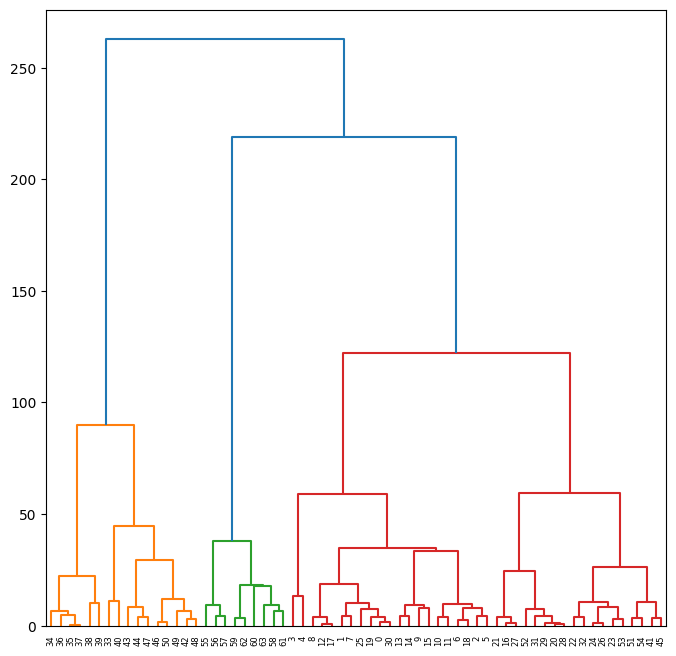

In [ ]:
# create a model
h_model = AgglomerativeClustering
h_model = h_model(linkage='ward', n_clusters=None, distance_threshold=0)

#train model
h_model.fit(X)

# visulize the model
c_distance = compute_linkage(h_model)
fig , ax = plt.subplots(1,1, figsize=(8,8))
dendrogram(c_distance, ax=ax ,); # add ; to avoid extra text


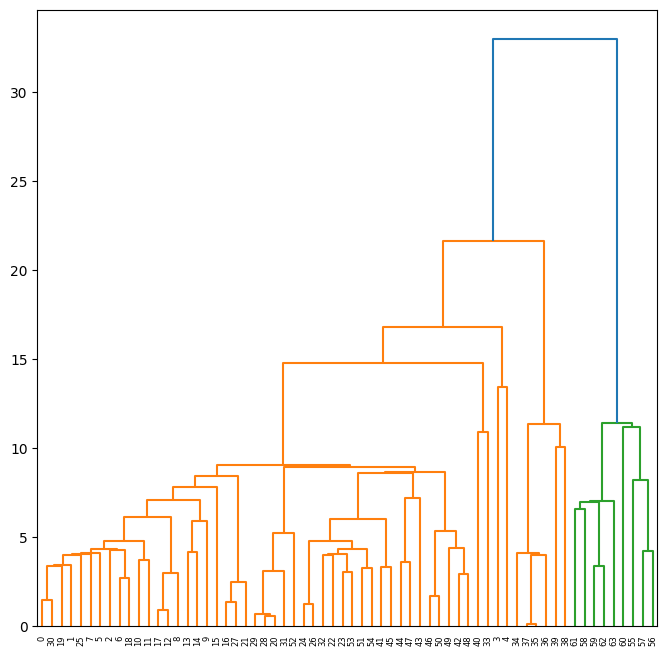

In [ ]:
# create a model
h_model = AgglomerativeClustering
h_model = h_model(linkage='single', n_clusters=None, distance_threshold=0)

#train model
h_model.fit(X)

# visulize the model
c_distance = compute_linkage(h_model)
fig , ax = plt.subplots(1,1, figsize=(8,8))
dendrogram(c_distance, ax=ax ,); # add ; to avoid extra text

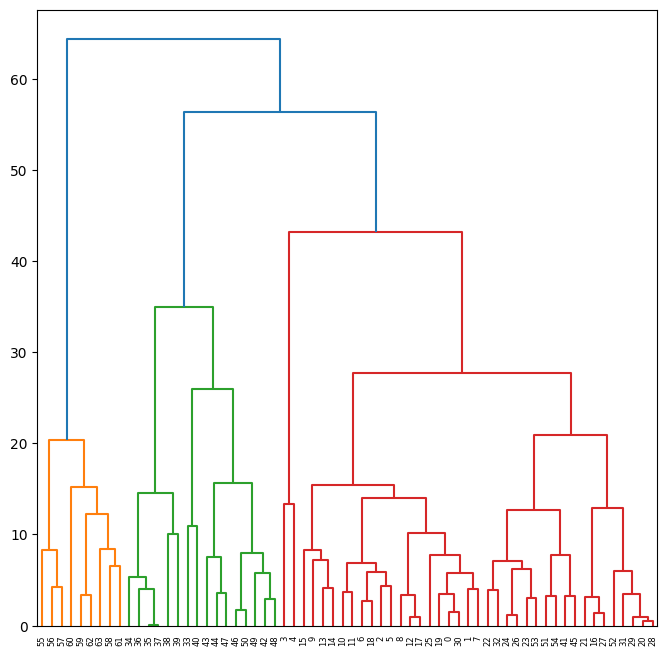

In [ ]:
# create a model
h_model = AgglomerativeClustering
h_model = h_model(linkage='average', n_clusters=None, distance_threshold=0)

#train model
h_model.fit(X)

# visulize the model
c_distance = compute_linkage(h_model)
fig , ax = plt.subplots(1,1, figsize=(8,8))
dendrogram(c_distance, ax=ax ,); # add ; to avoid extra text

which linkage is better and why?

ANSWER : I will be using **centroid** linkage method as there ase some outliers that can cause problems with other linkage methods like in case of single it is very bad, but in case of centroid even we should remove outlies it gives descent results.

one alternate for ward can be complete as we can see on the dendogram it provides nice seperation amoung clusters

note - all linkage methods will be disturbed by outliers so better to preprocess data every time before using this